In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

from gymnasium.spaces.utils import flatten, flatten_space
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph

def batchify_obs(obs_space, obs, device):
    """Converts PZ style observations to batch of torch arrays."""
    # convert to list of np arrays
    obs = np.stack([flatten(obs_space, obs[a]) for a in obs], axis=0)
    # convert to torch
    obs = torch.tensor(obs).to(device)

    return obs


In [2]:
G = PatrolGraph("patrolling_zoo/env/cumberland.graph")

In [3]:
env = parallel_env(G,num_agents=3,require_explicit_visit = False)

/Users/nicolasmartinet/miniforge3/lib/python3.9/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


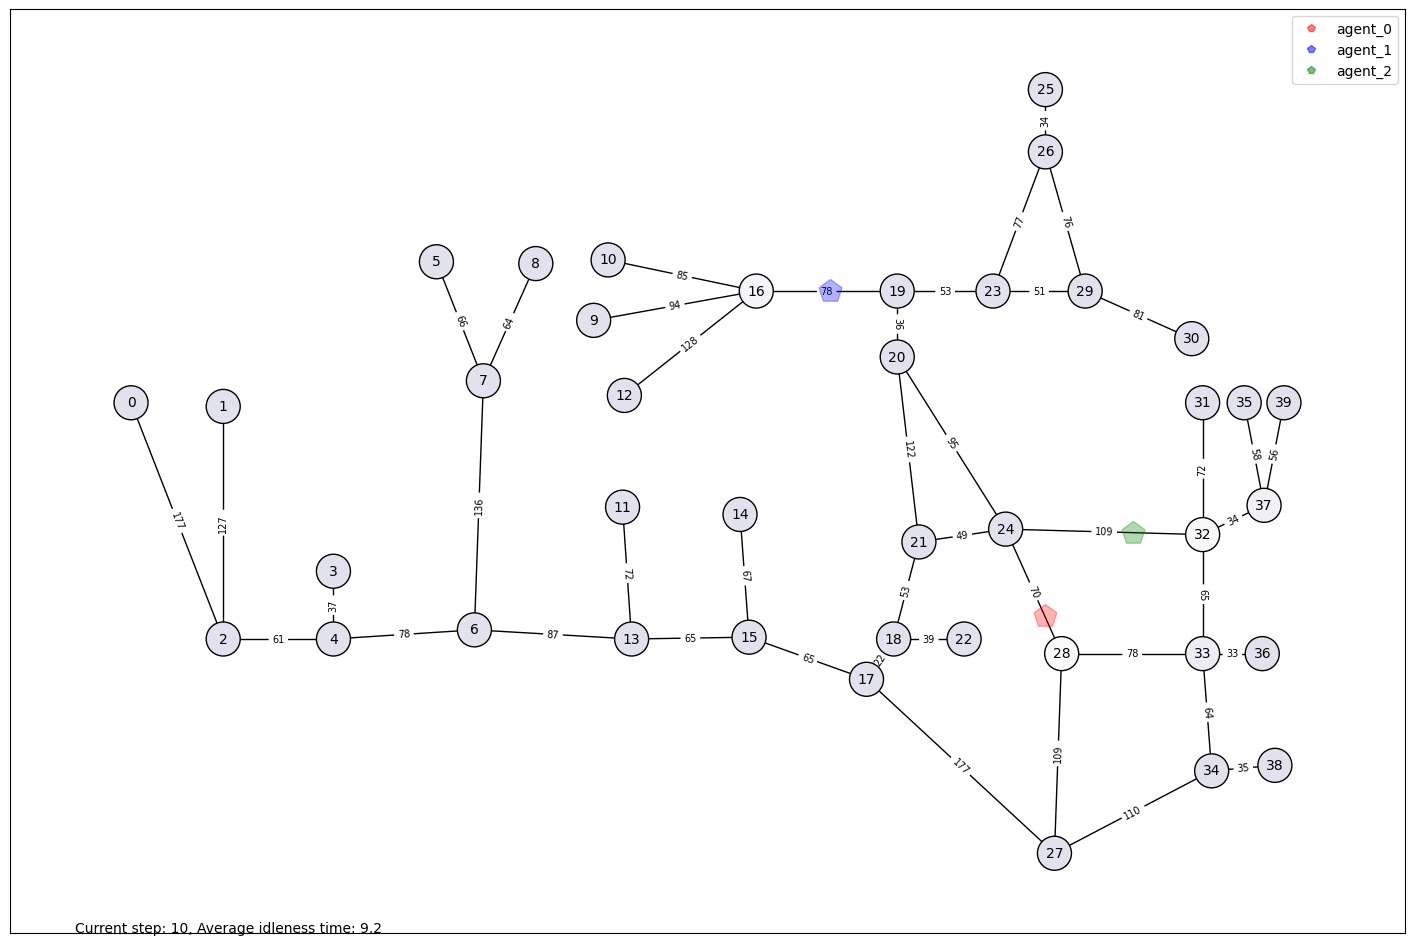

In [4]:
observations = env.reset(seed=42)

# We temporarily fix the actions to a single node visit for each agent.
actions = {agent: env.action_space(agent).sample() for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    clear_output(wait=True)
    env.render()

    i += 1
    if i >= 10:
        break
env.close()

In [5]:
env.global_observation()

NameError: name 'flatten_dict' is not defined

In [ ]:
def flatten_dict(dictionary):
    flattened_list = []
    for key, value in dictionary.items():
        if isinstance(value, dict):
            flattened_list.extend(flatten_dict(value))
        else:
            flattened_list.append(value)
    return flattened_list


In [ ]:
flatten_dict(env.reset())

[(2.3249999999999997, 21.675),
 (27.974999999999998, 12.075),
 (28.275, 26.25),
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 array([  0, 177, 304, 238, 275, 316, 518, 452, 403, 516, 938, 844, 929,
        475, 972, 468, 535, 533, 766, 710, 555, 608, 594, 730, 819, 657,
        896, 870, 766, 727, 930, 820, 805, 951, 838, 800, 838, 855, 858,
        856]),
 array([468, 291, 418, 230, 267, 152, 354, 288,  65, 352, 470, 376, 461,
        137, 504,   0,  67,  65, 298, 242,  87, 140, 126, 262, 351, 189,
        428, 402, 298, 259, 462, 352, 337, 483, 370, 332, 370, 387, 390,
        388]),
 array([844, 667, 794, 606, 643, 528, 730, 664, 441, 728,  94,   0,  85,
        513, 128, 376, 443, 311,  78, 388, 289, 236, 328, 114, 131, 209,
        208, 182, 318, 279, 242, 421, 357, 263, 390, 352, 390, 456

In [ ]:
a = flatten_dict(env.global_observation())

In [ ]:
def flatten_list(lst):
    flattened_list = []
    for item in lst:
        if isinstance(item, (list, tuple)):
            flattened_list.extend(flatten_list(item))
        else:
            flattened_list.append(item)
    return flattened_list


In [ ]:
def flatten_observation(dictionary):
    return flatten_list(flatten_dict(dictionary))

In [ ]:
torch.tensor(flatten_observation(env.global_observation()))

tensor([ 2.3250, 21.6750, 27.9750, 12.0750, 28.2750, 26.2500,  2.0000,  2.0000,
         2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,
         2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,
         2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,
         2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000,
         2.0000,  2.0000,  2.0000,  2.0000,  2.0000,  2.0000])

In [ ]:
env.step()

({<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x114000fa0>: {'agent_state': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x114000fa0>: (2.3249999999999997,
     21.675),
    <patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x114000a90>: (27.974999999999998,
     12.075),
    <patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x114000f10>: (28.275,
     26.25)},
   'vertex_state': {0: 2.0,
    2: 2.0,
    1: 2.0,
    4: 2.0,
    3: 2.0,
    6: 2.0,
    5: 2.0,
    7: 2.0,
    13: 2.0,
    8: 2.0,
    9: 2.0,
    16: 2.0,
    10: 2.0,
    11: 2.0,
    12: 2.0,
    15: 2.0,
    14: 2.0,
    17: 2.0,
    19: 2.0,
    27: 2.0,
    18: 2.0,
    21: 2.0,
    22: 2.0,
    20: 2.0,
    23: 2.0,
    24: 2.0,
    26: 2.0,
    29: 2.0,
    32: 2.0,
    28: 2.0,
    25: 2.0,
    34: 2.0,
    33: 2.0,
    30: 2.0,
    31: 2.0,
    37: 2.0,
    36: 2.0,
    38: 2.0,
    35: 2.0,
    39: 2.0},
   'vertex_distances': {<patrolling_zoo.env.patrolling_zoo.PatrolAgent at 0x114000fa0>: array([  

In [ ]:
[[2,1],[2]]

[[2, 1], [2]]